# Capstone Project - Sales Forecasting : Time Series
### Neha Purohit

Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks. 

As expected, store sales are influenced by many factors, including promotional campaigns, competition, state holidays, seasonality, and locality.

With thousands of individual managers predicting sales based on their unique circumstances and intuitions, the accuracy of the forecasts is quite varied. To overcome this problem, the company has hired you as a data scientist to work on the forecasting problem. As part of your job role, you are tasked with building a forecasting model to forecast the daily sales for the next six weeks. To help you with the same, you have been provided with historical sales data for 1,115 Rossmann stores.

Since the company is just embarking on this project, the scope has been kept to nine key stores across Europe. The stores are key for the company keeping in mind the revenue and historical prestige associated with them. These stores are numbered - 1,3,8,9,13,25,29,31 and 46.

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Importing the Sales data: Train and Store Data

In [42]:
train = pd.read_csv('train.csv')
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
train.sort_values('Date',ascending=True,inplace=True)

In [43]:
store = pd.read_csv('store.csv')

In [44]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1016473,379,2,2013-01-01,0,0,0,0,a,1
1016472,378,2,2013-01-01,0,0,0,0,a,1
1016471,377,2,2013-01-01,0,0,0,0,a,1
1016470,376,2,2013-01-01,0,0,0,0,a,1


In [45]:
store.head

<bound method NDFrame.head of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3        

In [46]:

train.shape

(1017209, 9)

In [47]:
stores_in_consideration = [1,3,8,9,13,25,29,31,46]

In [48]:
train = train.loc[train['Store'].isin(stores_to_consider)]

In [49]:
train.shape

(8110, 9)

In [50]:
display(train.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [51]:
# fillna in store with 0 is more suitable than median()
store.fillna(0, inplace=True)

In [52]:
display(train.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Outlier Treatment: Removing of the outliers at 99th percentile

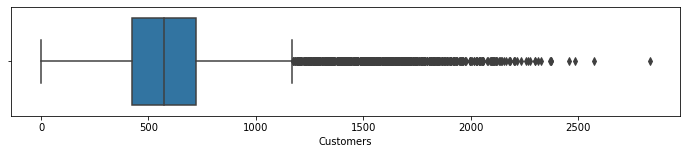

In [53]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=train['Customers'],whis=1.5)

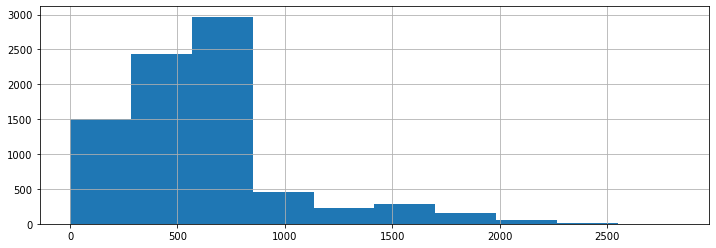

In [54]:
fig = train.Customers.hist(figsize = (12,4))

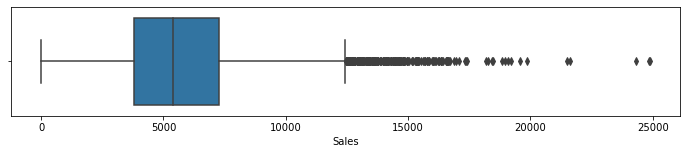

In [55]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=train['Sales'],whis=1.5)

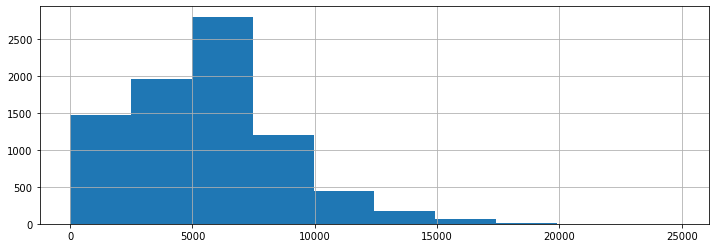

In [56]:
fig = train.Sales.hist(figsize = (12,4))

In [57]:
train.quantile(0.99)

Store               46.00
DayOfWeek            7.00
Sales            14810.28
Customers         1929.91
Open                 1.00
Promo                1.00
SchoolHoliday        1.00
Name: 0.99, dtype: float64

In [61]:
#Dropping data over 99 percentile
index = train[(train['Sales'] >= 14810.28)|(train['Customers'] >= 1929.91)].index
print(index)
train = train.drop(index)

Int64Index([], dtype='int64')


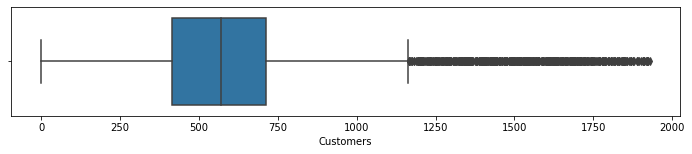

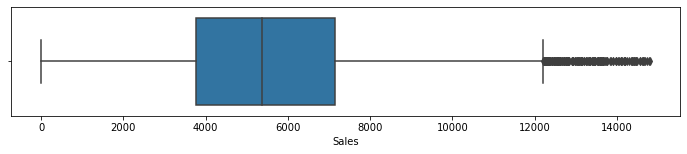

In [62]:
fig1 = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=train['Customers'],whis=1.5)
fig2 = plt.subplots(figsize=(12, 2))
by = sns.boxplot(x=train['Sales'],whis=1.5)

In [96]:
train.quantile(0.99)

Store                          46.000000
DayOfWeek                       7.000000
Sales                           0.894900
Customers                       0.918507
Open                            1.000000
Promo                           1.000000
SchoolHoliday                   1.000000
CompetitionDistance             1.000000
CompetitionOpenSinceMonth      12.000000
CompetitionOpenSinceYear     2014.000000
Promo2                          1.000000
Promo2SinceWeek                45.000000
Promo2SinceYear              2011.000000
Name: 0.99, dtype: float64

In [64]:
### Merging of the Store data with the Sales data with join function for Arima

In [65]:
train = pd.merge(train, store, on='Store')    ## for TimeSeries Arima Model
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Standardizing sales and customers features with MinMaxScaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Applying the scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Sales', 'Customers', 'CompetitionDistance']

train[num_vars] = scaler.fit_transform(train[num_vars])

### Stationarity Test - ADFuller Test

In [69]:
from statsmodels.tsa.stattools import adfuller 
list = ['Sales','Customers']
for i in range(len(list)):
    print('\n\n' + list[i] + ': ADFuller test results:\n')
    result = adfuller(train[list[i]])
    print('ADFuller Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADFuller test results:

ADFuller Statistic: -5.392543
p-value: 0.000004
Critical Values:
	5%: -2.862


Customers: ADFuller test results:

ADFuller Statistic: -4.710870
p-value: 0.000080
Critical Values:
	5%: -2.862


### Conclusion : As the p values are less than significance values, series are stationary

<AxesSubplot:title={'center':'Store1'}, xlabel='Date'>

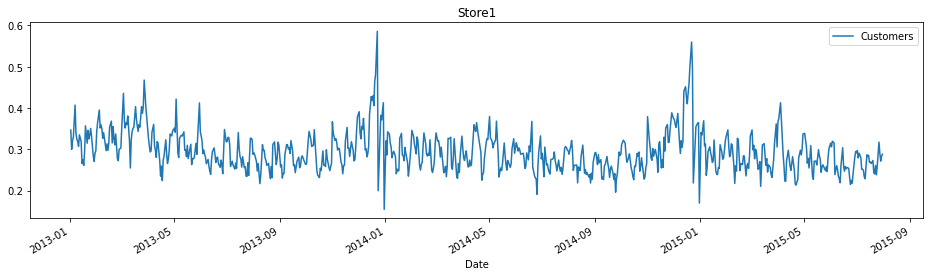

In [70]:
#store1 sales full time
strain = train[train.Customers>0]
(strain.loc[strain['Store']==1 ,['Date','Customers']]).sort_values('Date',ascending=True).plot(x='Date',y='Customers',title='Store1',figsize=(16,4),sort_columns=False)

<AxesSubplot:title={'center':'Store1'}, xlabel='Date'>

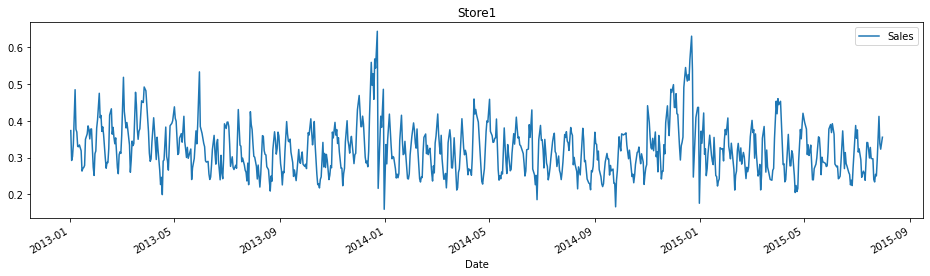

In [71]:
# store1 sales full timne
strain = train[train.Sales>0]
(strain.loc[strain['Store']==1 ,['Date','Sales']]).sort_values('Date',ascending=True).plot(x='Date',y='Sales',title='Store1',figsize=(16,4),sort_columns=False)

### VAR (Vector AutoRegression) Model

In [75]:
def get_indexed_store_data(data, store_num):
    data = data.loc[data['Store'] == store_num]
    data.index = data.Date
    train_VAR = data.loc['2013-01-01':'2015-06-30']#, ['dln_inv', 'dln_inc', 'dln_consump']] 
    test_VAR = data.loc['2015-07-01':]
    return data,train_VAR,test_VAR

In [76]:
data1,train1,test1 = get_indexed_store_data(train,1)
print(data1.shape,train1.shape,test1.shape)

(942, 18) (911, 18) (31, 18)


In [77]:
test1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,
2015-07-01,1,3,2015-07-01,0.352834,0.291343,1,1,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0
2015-07-02,1,4,2015-07-02,0.375464,0.297045,1,1,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0
2015-07-03,1,5,2015-07-03,0.315139,0.278901,1,1,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0
2015-07-04,1,6,2015-07-04,0.324056,0.290306,1,0,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0
2015-07-05,1,7,2015-07-05,0.000000,0.000000,0,0,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0
2015-07-06,1,1,2015-07-06,0.294467,0.279938,1,0,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0
2015-07-07,1,2,2015-07-07,0.246572,0.251426,1,0,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0
2015-07-08,1,3,2015-07-08,0.256502,0.251426,1,0,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0
2015-07-09,1,4,2015-07-09,0.263257,0.248834,1,0,0,0,c,a,0.069465,9.0,2008.0,0,0.0,0.0,0


In [80]:
#Check the AIC value - lower AIC => better model
exog = train1[['Open','Promo','Promo2']]
mod = sm.tsa.VARMAX(train1[['Sales', 'Customers']], order=(1,1), trend='n',exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  911
Model:                        VARMAX(1,1)   Log Likelihood                4042.096
Date:                    Mon, 17 Jan 2022   AIC                          -8050.193
Time:                            13:23:11   BIC                          -7968.345
Sample:                        01-01-2013   HQIC                         -8018.945
                             - 06-30-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             4.37, 1.18   Jarque-Bera (JB):       1591.72, 85.55
Prob(Q):                        0.04, 0.28   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.53, 0.87   Skew:                       1.07, 0.15
Prob(H) (two-sided):            0.00, 0.22   Kurtosis:                   9.11, 4.47


In [82]:
startindex = test1.index.min()
endindex = test1.index.max()
predictions = mod.fit().predict(start=startindex, end=endindex,exog=test1[['Open','Promo','Promo2']])

In [84]:
startindex

Timestamp('2015-07-01 00:00:00')

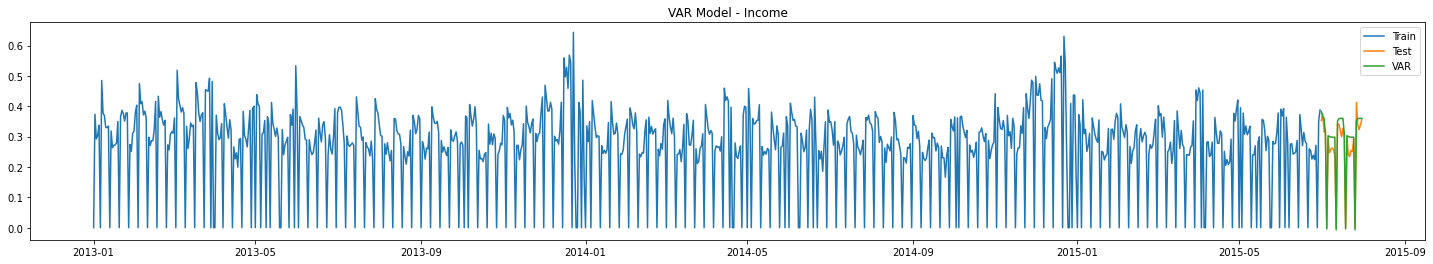

In [85]:
plt.figure(figsize=(25,4)) 
plt.plot( train1['Sales'], label='Train')
plt.plot(test1['Sales'], label='Test')
plt.plot(predictions['Sales'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Income')
plt.show()

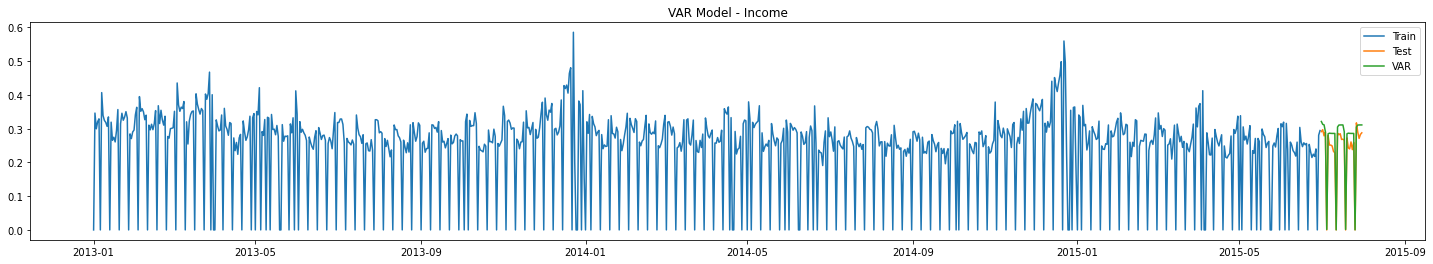

In [86]:
plt.figure(figsize=(25,4)) 
plt.plot( train1['Customers'], label='Train')
plt.plot(test1['Customers'], label='Test')
plt.plot(predictions['Customers'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Income')
plt.show()

### Conclusion 2 : Forecast for next few months seems to be steady from above plot.

In [90]:
#RMSE and MAPE Comparision for Bias
from sklearn.metrics import mean_squared_error
test2 = test1[['Sales', 'Customers']]
zero_Sales = test2.index[test2.Sales == 0]
test2 = test2.drop(zero_Sales)
predictions2 = predictions.drop(zero_Sales)
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test2.Sales, predictions2.Sales)).round(2)
#print('Salesome: RMSE:',  rmse)

model_comparison=pd.DataFrame()
model_comparison.loc[0,'Model']='VAR'
model_comparison.loc[0,'Variable']='Sales'
model_comparison.loc[0,'RMSE']=rmse

rmse = np.sqrt(mean_squared_error(test2.Customers, predictions2.Customers)).round(2)
#print('Customersestment: RMSE:',  rmse)

append=pd.DataFrame()
append.loc[0,'Model']='VAR'
append.loc[0,'Variable']='Customers'
append.loc[0,'RMSE']=rmse

model_comparison = model_comparison.append(append)

# Mean Absolute Percentage Error
abs_error = np.abs(test2.Sales-predictions2.Sales)
actual = test2.Sales
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Salesome: MAPE:',  mape)

model_comparison.loc[model_comparison['Variable']=='Sales', 'MAPE'] = mape

abs_error = np.abs(test2.Customers-predictions2.Customers)
actual = test2.Customers
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Customersestment: MAPE:',  mape)

model_comparison.loc[model_comparison['Variable']=='Customers', 'MAPE'] = mape

In [91]:
model_comparison.reset_index(drop=True, inplace=True)
model_comparison

,Model,Variable,RMSE,MAPE
0,VAR,Sales,0.04,11.54
1,VAR,Customers,0.03,11.57


### Cointegration Test to check correlation

In [92]:
from statsmodels.tsa.stattools import coint
coint(train1['Sales'],train1['Customers'])

(-6.2398894045794195,
 4.845381432304959e-07,
 array([-3.90851554, -3.34285263, -3.04911394]))

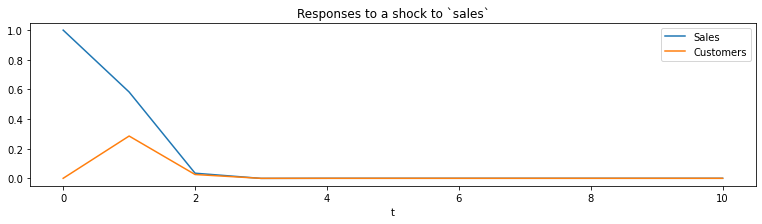

In [93]:
ax = res.impulse_responses(10, orthogonalized=False).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `sales`');

### Customers are directly impacting sales we can see from above graph

# Summary

In [ ]:
Q : Is the sales data non-stationary? If so, how do you find it and correct it?
A : The Sales Data is stationary as we saw from ADFuller test where P-value is less than significant value

Q : Is the data cointegrated? Which variables are cointegrated and how do you find them?
A : Johansen test shows the cointegration between Sales and Customers
    
Q : What is the impact of the number of customers on sales?
A : Customers are directly impacting sales as seen from Response to Shock - Johansen test.

Q : What is the impact of promo and promo2 variables on sales? How do you measure it?
A : Promo and Promo2 aid in improving RMSE and MAPE, as well as model accuracy.
    
Q : Forecast sales for the next 6 weeks? Report the accuracy of the model using MAPE.
A : Forecast for next 6 weeks will be steady as per  Conclusion 2 above.
    
    Model	Variable	RMSE	MAPE
    0	VAR	Sales   	0.04	11.54
    1	VAR	Customers	0.03	11.57
